In [10]:
from fastai.vision.all import *
import glob
import matplotlib.pyplot as plt
from numpy import loadtxt
from PIL import Image, ImageStat
import shutil
import os
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.pyplot import figure

In [3]:
path = sorted(glob.glob('data\\CGnA10766\\data\\cgna\\*.jpg'),key=len)

In [ ]:
path

In [ ]:
img = PILImage.create(path[0])
img

In [ ]:
#average RGB value of img above
stat = ImageStat.Stat(img)
print(stat.mean)

In [ ]:
meanR=[]
meanG=[]
meanB=[]
for i in path:
    image=PILImage.create(i)
    stat = ImageStat.Stat(image)
    meanR.append(stat.mean[0])
    meanG.append(stat.mean[1])
    meanB.append(stat.mean[2])

In [ ]:
print(meanR[0],meanG[0],meanB[0])

In [ ]:
#average HSV value of img above
img_hsv = img.convert('HSV')
stat_hsv=ImageStat.Stat(img_hsv)
print(stat_hsv.mean)

In [ ]:
meanH=[]
meanS=[]
meanV=[]
for i in path:
    image=PILImage.create(i)
    image_hsv = image.convert('HSV')
    stat = ImageStat.Stat(image_hsv)
    meanH.append(stat.mean[0])
    meanS.append(stat.mean[1])
    meanV.append(stat.mean[2])

In [ ]:
print(meanH[0],meanS[0],meanV[0])

In [4]:
aro=loadtxt('data\\arousal_avg_10766_v2.txt')
aro

array([2.84, 5.13, 3.8 , ..., 3.6 , 5.  , 4.6 ])

In [5]:
val=loadtxt('data\\valence_avg_10766_v2.txt')
val

array([8.12, 4.31, 5.92, ..., 5.2 , 6.17, 4.8 ])

In [ ]:
#plot scatter plot of arousal against valence for distribution
plt.subplots(figsize=(15, 15))
plt.scatter(aro,val,c=aro-val)
plt.xlabel('Arousal Value')
plt.ylabel('Valence Value')
plt.title('Arousal and Valence values')
plt.colorbar()
plt.show()

In [ ]:
plt.subplots(figsize=(15, 15))
plt.scatter(aro,val,c=meanR)
plt.xlabel('Arousal Value')
plt.ylabel('Valence Value')
plt.title('Arousal and Valence values with Red values')
plt.colorbar()
plt.show()

In [ ]:
plt.subplots(figsize=(15, 15))
plt.scatter(aro,val,c=meanG)
plt.xlabel('Arousal Value')
plt.ylabel('Valence Value')
plt.title('Arousal and Valence values with Green values')
plt.colorbar()
plt.show()

In [ ]:
plt.subplots(figsize=(15, 15))
plt.scatter(aro,val,c=meanB)
plt.xlabel('Arousal Value')
plt.ylabel('Valence Value')
plt.title('Arousal and Valence values with Blue values')
plt.colorbar()
plt.show()

In [ ]:
plt.subplots(figsize=(15, 15))
plt.scatter(aro,val,c=meanH)
plt.xlabel('Arousal Value')
plt.ylabel('Valence Value')
plt.title('Arousal and Valence values with Hue values')
plt.colorbar()
plt.show()

In [ ]:
plt.subplots(figsize=(15, 15))
plt.scatter(aro,val,c=meanS)
plt.xlabel('Arousal Value')
plt.ylabel('Valence Value')
plt.title('Arousal and Valence values with Saturation values')
plt.colorbar()
plt.show()

In [ ]:
plt.subplots(figsize=(15, 15))
plt.scatter(aro,val,c=meanV)
plt.xlabel('Arousal Value')
plt.ylabel('Valence Value')
plt.title('Arousal and Valence values with Value')
plt.colorbar()
plt.show()

In [6]:
df=pd.DataFrame(data=path,columns=['path'])
df['arousal']=aro
df['valence']=val
df

path  arousal  valence
0          data\CGnA10766\data\cgna\1.jpg     2.84     8.12
1          data\CGnA10766\data\cgna\2.jpg     5.13     4.31
2          data\CGnA10766\data\cgna\3.jpg     3.80     5.92
3          data\CGnA10766\data\cgna\4.jpg     5.32     5.47
4          data\CGnA10766\data\cgna\5.jpg     5.23     4.93
...                                   ...      ...      ...
10761  data\CGnA10766\data\cgna\10762.jpg     4.20     3.20
10762  data\CGnA10766\data\cgna\10763.jpg     5.57     3.00
10763  data\CGnA10766\data\cgna\10764.jpg     3.60     5.20
10764  data\CGnA10766\data\cgna\10765.jpg     5.00     6.17
10765  data\CGnA10766\data\cgna\10766.jpg     4.60     4.80

[10766 rows x 3 columns]

In [7]:
#grouping photos into groups
a2v2=df[(df['arousal'] <= 2) & (df['valence'] <= 2)]
a4v2=df[(df['arousal'] >2 ) & (df['arousal'] <=4 ) & (df['valence'] <= 2)]
a6v2=df[(df['arousal'] >4 ) & (df['arousal'] <=6 ) & (df['valence'] <= 2)]
a8v2=df[(df['arousal'] >6 ) & (df['arousal'] <=8 ) & (df['valence'] <= 2)]
a10v2=df[(df['arousal'] > 8) & (df['valence'] <= 2)]

a2v4=df[(df['arousal'] <= 2) & (df['valence'] > 2) & (df['valence'] <= 4)]
a4v4=df[(df['arousal'] >2 ) & (df['arousal'] <=4 ) & (df['valence'] > 2) & (df['valence'] <= 4)]
a6v4=df[(df['arousal'] >4 ) & (df['arousal'] <=6 ) & (df['valence'] > 2) & (df['valence'] <= 4)]
a8v4=df[(df['arousal'] >6 ) & (df['arousal'] <=8 ) & (df['valence'] > 2) & (df['valence'] <= 4)]
a10v4=df[(df['arousal'] > 8) & (df['valence'] > 2) & (df['valence'] <= 4)]

a2v6=df[(df['arousal'] <= 2) & (df['valence'] > 4) & (df['valence'] <= 6)]
a4v6=df[(df['arousal'] >2 ) & (df['arousal'] <=4 ) & (df['valence'] > 4) & (df['valence'] <= 6)]
a6v6=df[(df['arousal'] >4 ) & (df['arousal'] <=6 ) & (df['valence'] > 4) & (df['valence'] <= 6)]
a8v6=df[(df['arousal'] >6 ) & (df['arousal'] <=8 ) & (df['valence'] > 4) & (df['valence'] <= 6)]
a10v6=df[(df['arousal'] > 8) & (df['valence'] > 4) & (df['valence'] <= 6)]

a2v8=df[(df['arousal'] <= 2) & (df['valence'] > 6) & (df['valence'] <= 8)]
a4v8=df[(df['arousal'] >2 ) & (df['arousal'] <=4 ) & (df['valence'] > 6) & (df['valence'] <= 8)]
a6v8=df[(df['arousal'] >4 ) & (df['arousal'] <=6 ) & (df['valence'] > 6) & (df['valence'] <= 8)]
a8v8=df[(df['arousal'] >6 ) & (df['arousal'] <=8 ) & (df['valence'] > 6) & (df['valence'] <= 8)]
a10v8=df[(df['arousal'] > 8) & (df['valence'] > 6) & (df['valence'] <= 8)]

a2v10=df[(df['arousal'] <= 2) & (df['valence'] > 8)]
a4v10=df[(df['arousal'] >2 ) & (df['arousal'] <=4 ) & (df['valence'] > 8)]
a6v10=df[(df['arousal'] >4 ) & (df['arousal'] <=6 ) & (df['valence'] > 8)]
a8v10=df[(df['arousal'] >6 ) & (df['arousal'] <=8 ) & (df['valence'] > 8)]
a10v10=df[(df['arousal'] > 8) & (df['valence'] > 8)]


In [ ]:
for i in range (2,11,2):
    for j in range (2,11,2):
        os.mkdir('./groups/a'+str(i)+'v'+str(j))

In [ ]:
for i in a3v3.path:
    shutil.copy(i,'./groups/a3v3')
for i in a5v3.path:
    shutil.copy(i,'./groups/a5v3')
for i in a8v3.path:
    shutil.copy(i,'./groups/a8v3')
for i in a10v3.path:
    shutil.copy(i,'./groups/a10v3')
    
for i in a3v5.path:
    shutil.copy(i,'./groups/a3v5')
for i in a5v5.path:
    shutil.copy(i,'./groups/a5v5')
for i in a8v5.path:
    shutil.copy(i,'./groups/a8v5')
for i in a10v5.path:
    shutil.copy(i,'./groups/a10v5')
    
for i in a3v8.path:
    shutil.copy(i,'./groups/a3v8')
for i in a5v8.path:
    shutil.copy(i,'./groups/a5v8')
for i in a8v8.path:
    shutil.copy(i,'./groups/a8v8')
for i in a10v8.path:
    shutil.copy(i,'./groups/a10v8')

for i in a3v10.path:
    shutil.copy(i,'./groups/a3v10')
for i in a5v10.path:
    shutil.copy(i,'./groups/a5v10')
for i in a8v10.path:
    shutil.copy(i,'./groups/a8v10')
for i in a10v10.path:
    shutil.copy(i,'./groups/a10v10')

In [8]:
g=[a2v2,a4v2,a6v2,a8v2,a10v2,a2v4,a4v4,a6v4,a8v4,a10v4,a2v6,a4v6,a6v6,a8v6,a10v6,a2v8,a4v8,a6v8,a8v8,a10v8,a2v10,a4v10,a6v10,a8v10,a10v10]
g2=["a2v2",'a4v2','a6v2','a8v2','a10v2','a2v4','a4v4','a6v4','a8v4','a10v4','a2v6','a4v6','a6v6','a8v6','a10v6','a2v8','a4v8','a6v8','a8v8','a10v8','a2v10','a4v10','a6v10','a8v10','a10v10']

In [ ]:
for i,k in zip(g,g2):
    for j in i.path:
        shutil.copy(j,'./groups/'+k)

In [24]:
def getImage(path, zoom=0.1):
    return OffsetImage(plt.imread(path), zoom=zoom)

def scatter(df):
    paths =df.path
    x = df.arousal
    y = df.valence
    fig, ax = plt.subplots(figsize=(50, 50))
    ax.scatter(x,y)

    for x0, y0, path in zip(x, y,paths):
        ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
        ax.add_artist(ab)

Text(0.5, 1.0, 'Distribution of arousal and valence of first 1000 images')

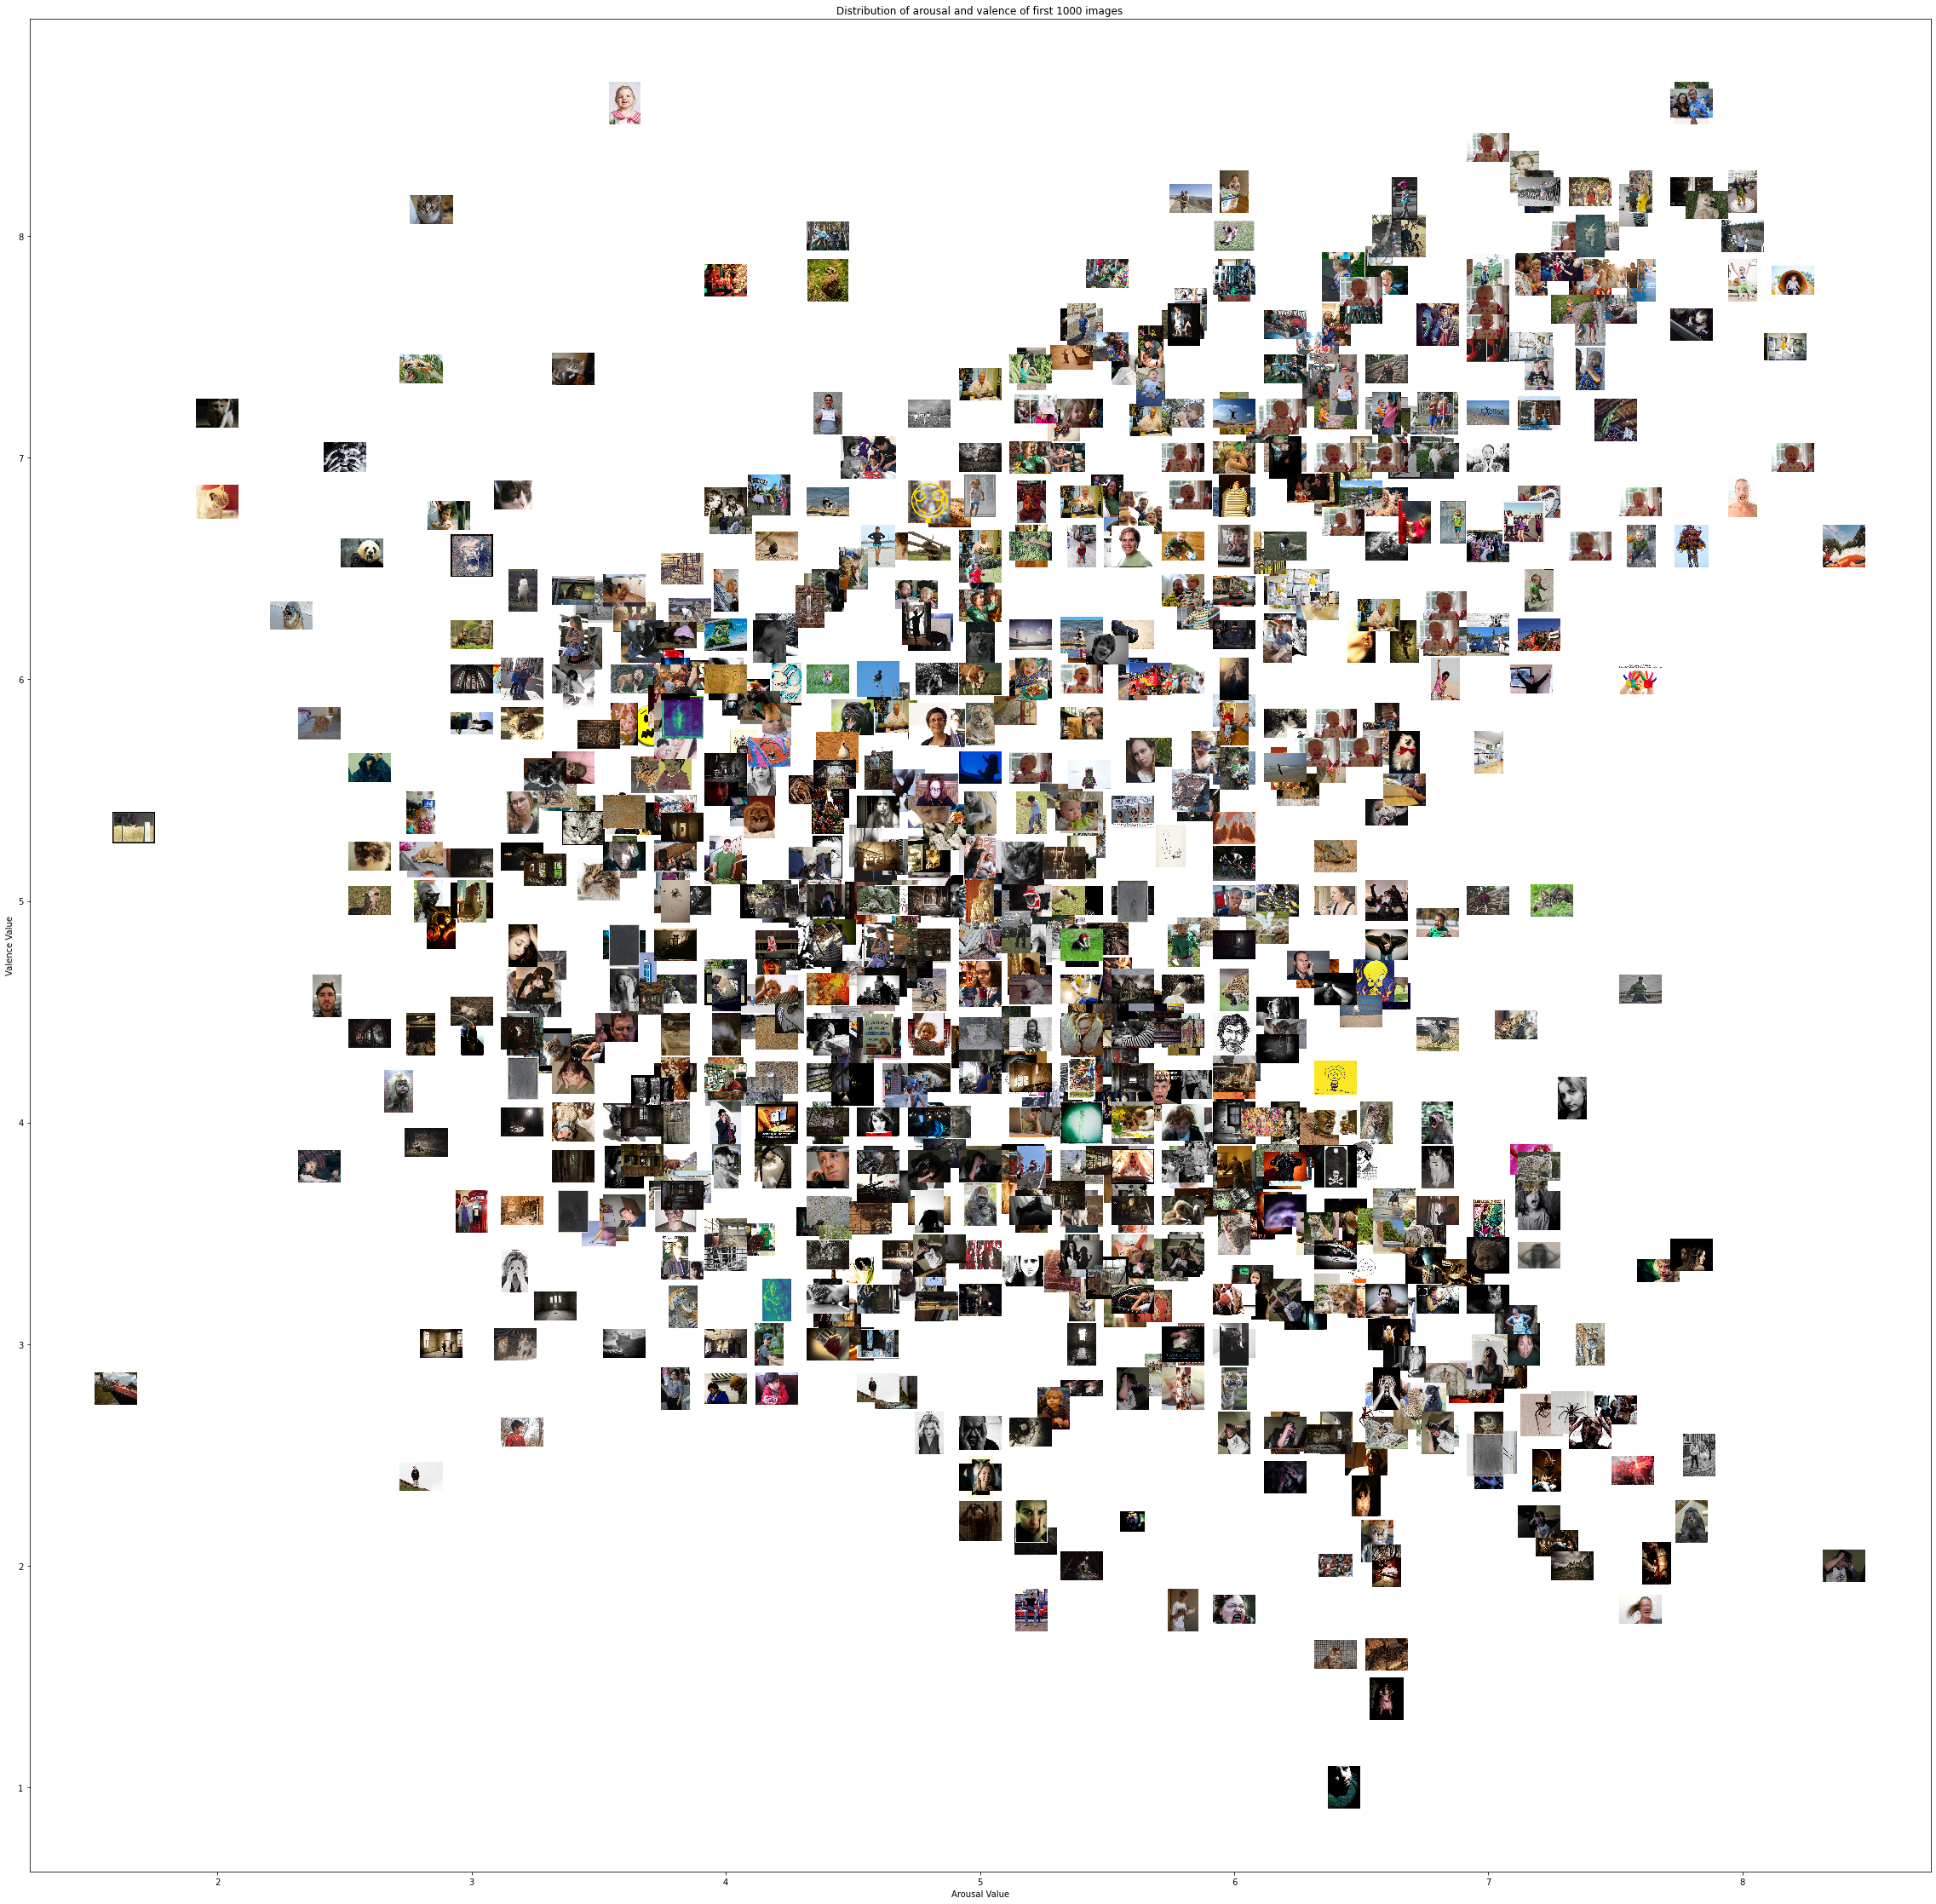

In [29]:
scatter(df[:1000])
plt.xlabel('Arousal Value')
plt.ylabel('Valence Value')
plt.title('Distribution of arousal and valence of first 1000 images')